In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Recommended Analysis
1. what were the most popular baby names of each decade? how does this change over time?
2. Which baby names had the biggest jumps and drops in popularity?
3. Are there diffrences in which names are given to boys or girls vs both over time?
4. Are there differences in baby name popularity based on the region in the united state?

In [2]:
names = pd.read_csv('names.csv',index_col= 0)
names

,Gender,Year,Name,Births
State,,,,
AK,F,1980,Jessica,116
AK,F,1980,Jennifer,114
AK,F,1980,Sarah,82
AK,F,1980,Amanda,71
AK,F,1980,Melissa,65
...,...,...,...,...
WY,M,2009,River,5
WY,M,2009,Talon,5
WY,M,2009,Tate,5


In [3]:
names.columns

Index(['Gender', 'Year', 'Name', 'Births'], dtype='object')

In [5]:
regions=pd.read_csv('regions.csv',index_col=0)
regions

,Region
State,
AL,South
AK,Pacific
AZ,Mountain
AR,South
CA,Pacific
CO,Mountain
CT,New_England
DC,Mid_Atlantic
DE,South


In [6]:
print(names.columns)
print(regions.columns)

Index(['Gender', 'Year', 'Name', 'Births'], dtype='object')
Index(['Region'], dtype='object')


In [7]:
US_names= names.merge(regions,on ='State')
US_names.head()

,Gender,Year,Name,Births,Region
State,,,,,
AK,F,1980,Jessica,116,Pacific
AK,F,1980,Jennifer,114,Pacific
AK,F,1980,Sarah,82,Pacific
AK,F,1980,Amanda,71,Pacific
AK,F,1980,Melissa,65,Pacific


In [8]:
US_names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2144561 entries, AK to WY
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Gender  object
 1   Year    int64 
 2   Name    object
 3   Births  int64 
 4   Region  object
dtypes: int64(2), object(3)
memory usage: 98.2+ MB


In [9]:
US_names.isna().sum()

Gender    0
Year      0
Name      0
Births    0
Region    0
dtype: int64

In [10]:
US_names.Name.unique()

array(['Jessica', 'Jennifer', 'Sarah', ..., 'Brewer', 'Evrett', 'Okey'],
      dtype=object)

In [11]:

print(US_names.Year.max())
print(US_names.Year.min())

2009
1980


In [12]:
us_name=US_names.dropna().reset_index()
us_name.head()

,State,Gender,Year,Name,Births,Region
0,AK,F,1980,Jessica,116,Pacific
1,AK,F,1980,Jennifer,114,Pacific
2,AK,F,1980,Sarah,82,Pacific
3,AK,F,1980,Amanda,71,Pacific
4,AK,F,1980,Melissa,65,Pacific


In [13]:
us_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144561 entries, 0 to 2144560
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   State   object
 1   Gender  object
 2   Year    int64 
 3   Name    object
 4   Births  int64 
 5   Region  object
dtypes: int64(2), object(4)
memory usage: 98.2+ MB


In [14]:
us_name.columns

Index(['State', 'Gender', 'Year', 'Name', 'Births', 'Region'], dtype='object')

In [15]:
us_df1 =us_name.loc[us_name['Year']<= 1989]
us_df1

,State,Gender,Year,Name,Births,Region
0,AK,F,1980,Jessica,116,Pacific
1,AK,F,1980,Jennifer,114,Pacific
2,AK,F,1980,Sarah,82,Pacific
3,AK,F,1980,Amanda,71,Pacific
4,AK,F,1980,Melissa,65,Pacific
...,...,...,...,...,...,...
2139033,WY,M,1989,Roger,5,Mountain
2139034,WY,M,1989,Ronald,5,Mountain
2139035,WY,M,1989,Ross,5,Mountain
2139036,WY,M,1989,Ty,5,Mountain


# FIRST DECADE FROM 1980-1989
    The most popular us babe names are Micheal followed by Christopher 

In [16]:
firstde =pd.DataFrame(us_df1.groupby('Name')['Births'].sum()).sort_values('Births',ascending= False)
firstde['pct'] = round(firstde['Births']/firstde['Births'].sum()*100,2)
firstde.reset_index()

,Name,Births,pct
0,Michael,641212,2.06
1,Christopher,538542,1.73
2,Jessica,452827,1.45
3,Matthew,441051,1.42
4,Jennifer,424548,1.36
...,...,...,...
11332,Lakevia,5,0.00
11333,Lakima,5,0.00
11334,Lakindra,5,0.00
11335,Lakresha,5,0.00


In [17]:
firstde =pd.DataFrame(us_df1.groupby('Name')['Births'].sum()).sort_values('Births',ascending= False)
VIZ1 = firstde.head(10).reset_index()
VIZ1

,Name,Births
0,Michael,641212
1,Christopher,538542
2,Jessica,452827
3,Matthew,441051
4,Jennifer,424548
5,Joshua,383162
6,David,370191
7,Amanda,354306
8,James,345477
9,Ashley,343763


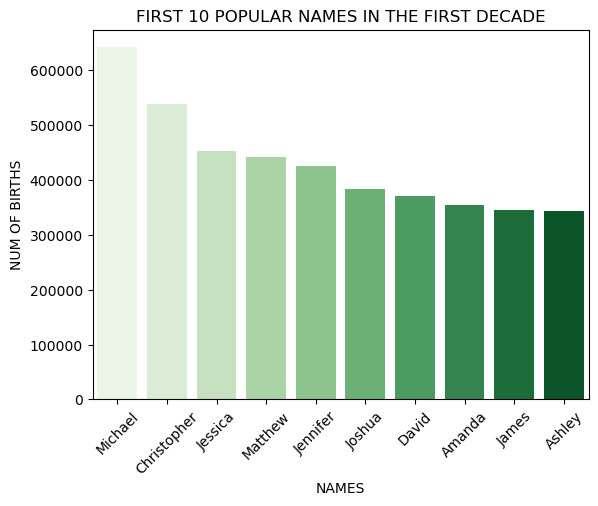

In [55]:
sns.barplot(VIZ1,x='Name',y='Births',palette= 'Greens')
plt.xticks(rotation = 45)
plt.xlabel('NAMES')
plt.ylabel('NUM OF BIRTHS')
plt.title('FIRST 10 POPULAR NAMES IN THE FIRST DECADE');

In [19]:
us_df2 =us_name.loc[(us_name['Year'] >= 1990) & (us_name['Year'] <=1999)]
us_df2

,State,Gender,Year,Name,Births,Region
4113,AK,F,1990,Jessica,113,Pacific
4114,AK,F,1990,Ashley,97,Pacific
4115,AK,F,1990,Amanda,92,Pacific
4116,AK,F,1990,Brittany,75,Pacific
4117,AK,F,1990,Samantha,72,Pacific
...,...,...,...,...,...,...
2141645,WY,M,1999,Paul,5,Mountain
2141646,WY,M,1999,Quinn,5,Mountain
2141647,WY,M,1999,Tristen,5,Mountain
2141648,WY,M,1999,Triston,5,Mountain


# SECOND DECADE FROM 1990-1999
The most popular us babe names are Micheal followed by Christopher 

In [20]:
secdec= pd.DataFrame(us_df2.groupby('Name')['Births'].sum()).sort_values('Births',ascending= False).head(10)
secdec['pct'] = round(secdec['Births']/secdec['Births'].sum()*100,2)
secdec.reset_index()

,Name,Births,pct
0,Michael,446642,14.37
1,Christopher,349865,11.25
2,Matthew,339351,10.91
3,Joshua,316541,10.18
4,Jessica,293098,9.43
5,Ashley,290842,9.35
6,Jacob,282828,9.10
7,Daniel,264655,8.51
8,Nicholas,263647,8.48
9,Andrew,261741,8.42


In [21]:
secdec= pd.DataFrame(us_df2.groupby('Name')['Births'].sum()).sort_values('Births',ascending= False)
VIZ2 = secdec.head(10).reset_index()

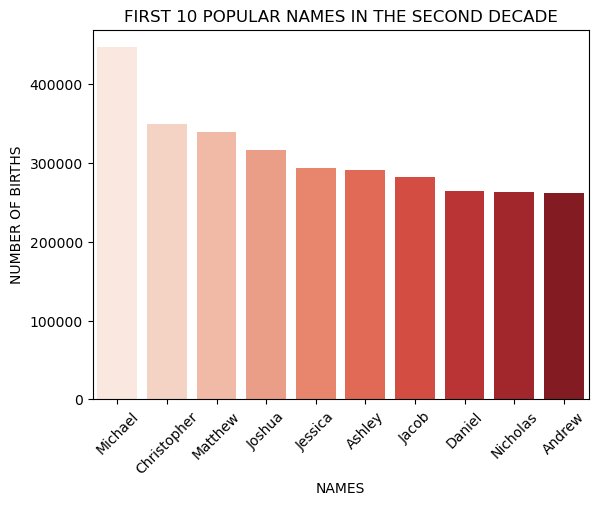

In [22]:
sns.barplot(VIZ2,x= 'Name',y= 'Births',palette= 'Reds')
plt.xticks(rotation = 45)
plt.xlabel('NAMES')
plt.ylabel('NUMBER OF BIRTHS')
plt.title('FIRST 10 POPULAR NAMES IN THE SECOND DECADE');

In [23]:
us_df3 =us_name.loc[(us_name['Year'] >= 2000)]
us_df3

,State,Gender,Year,Name,Births,Region
8148,AK,F,2000,Hannah,58,Pacific
8149,AK,F,2000,Madison,50,Pacific
8150,AK,F,2000,Emily,48,Pacific
8151,AK,F,2000,Sarah,39,Pacific
8152,AK,F,2000,Ashley,36,Pacific
...,...,...,...,...,...,...
2144556,WY,M,2009,River,5,Mountain
2144557,WY,M,2009,Talon,5,Mountain
2144558,WY,M,2009,Tate,5,Mountain
2144559,WY,M,2009,Timothy,5,Mountain


# THIRD DECADE FROM 2001-2009
The most popular us babe names are Jacob followed by Micheal 

In [24]:
thirddec = pd.DataFrame(us_df3.groupby('Name')['Births'].sum()).sort_values('Births',ascending= False).head(10)
thirddec['pct'] = round(thirddec['Births']/thirddec['Births'].sum()*100,2)
thirddec.reset_index()

,Name,Births,pct
0,Jacob,263177,12.29
1,Michael,243308,11.37
2,Joshua,224787,10.50
3,Emily,216993,10.14
4,Matthew,215113,10.05
5,Daniel,199428,9.32
6,Christopher,198739,9.28
7,Andrew,195219,9.12
8,Ethan,194514,9.09
9,William,189456,8.85


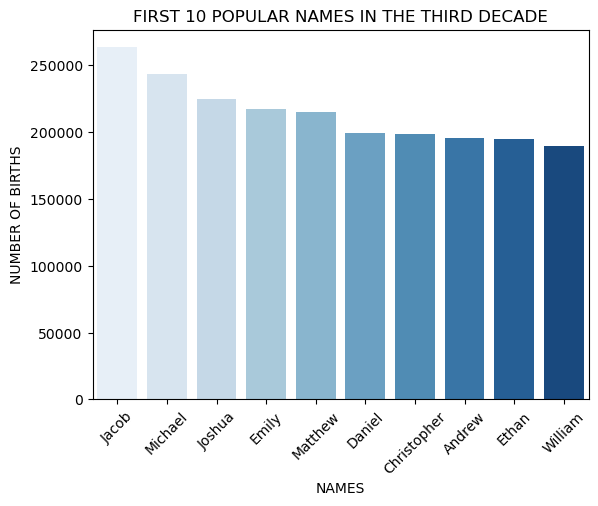

In [25]:
thirddec = pd.DataFrame(us_df3.groupby('Name')['Births'].sum()).sort_values('Births',ascending= False).head(10)
VIZ3 = thirddec.head(10).reset_index()
sns.barplot(VIZ3,x='Name',y='Births',palette='Blues')
plt.xticks(rotation = 45)
plt.xlabel('NAMES')
plt.ylabel('NUMBER OF BIRTHS')
plt.title('FIRST 10 POPULAR NAMES IN THE THIRD DECADE');

In [26]:
us_name.sort_values(['Name'],inplace = True)
us_name

,State,Gender,Year,Name,Births,Region
1924681,TX,M,2008,Aadan,5,South
311997,CA,M,2009,Aadan,6,Pacific
308880,CA,M,2008,Aadan,7,Pacific
730935,IL,M,2009,Aadarsh,5,Midwest
1676532,PA,M,2007,Aaden,5,Mid_Atlantic
...,...,...,...,...,...,...
1904263,TX,F,2009,Zyriah,5,South
558964,GA,F,2007,Zyriah,5,South
1892618,TX,F,2006,Zyriah,6,South
1895590,TX,F,2007,Zyriah,8,South


In [27]:
us_name['POCHANGE'] = us_name.groupby(['Name'])['Births'].pct_change()*100
us_name.head(10).dropna()

,State,Gender,Year,Name,Births,Region,POCHANGE
311997,CA,M,2009,Aadan,6,Pacific,20.000000
308880,CA,M,2008,Aadan,7,Pacific,16.666667
1922763,TX,M,2008,Aaden,99,South,1880.000000
844934,KY,M,2009,Aaden,24,South,-75.757576
1461346,NY,M,2007,Aaden,8,Mid_Atlantic,-66.666667
353528,CO,M,2007,Aaden,6,Mountain,-25.000000
2116771,WI,M,2009,Aaden,23,Midwest,283.333333


In [28]:
jumps = us_name[us_name['POCHANGE'] == us_name.groupby('Name')['POCHANGE'].transform('max')]
drops = us_name[us_name['POCHANGE'] == us_name.groupby('Name')['POCHANGE'].transform('min')]

In [29]:
jump1 = pd.DataFrame(jumps.sort_values('POCHANGE',ascending=False))
jumpv=jump1.head(10)
jumpv

,State,Gender,Year,Name,Births,Region,POCHANGE
219922,CA,M,1990,Michael,8240,Pacific,137233.333333
230068,CA,M,1994,Daniel,5117,Pacific,102240.000000
187253,CA,F,1991,Jessica,6949,Pacific,99171.428571
1377728,NY,M,1988,Christopher,4166,Mid_Atlantic,83220.000000
1805456,TX,F,1987,Ashley,4162,South,83140.000000
224952,CA,M,1992,David,4840,Pacific,80566.666667
178861,CA,M,1988,Joshua,3942,Pacific,78740.000000
285329,CA,M,2000,Anthony,3837,Pacific,76640.000000
1351060,NY,F,1982,Jennifer,3767,Mid_Atlantic,75240.000000
172718,CA,M,1985,Robert,3698,Pacific,73860.000000


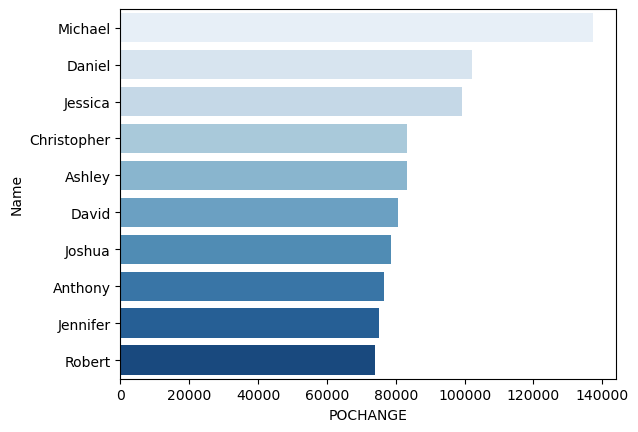

In [30]:
sns.barplot(jumpv,y='Name',x='POCHANGE',orient='h',palette ='Blues');

In [31]:
drops1 = pd.DataFrame(drops.sort_values('POCHANGE'))
dropv=drops1.head(10)
dropv

,State,Gender,Year,Name,Births,Region,POCHANGE
2081202,WI,F,1987,Michael,5,Midwest,-99.933119
735630,IN,F,1985,Christopher,5,Midwest,-99.921272
659388,IL,M,1981,Jessica,6,Midwest,-99.913657
1967672,VA,F,1985,David,5,South,-99.902496
1350883,NY,F,1981,Jose,5,Mid_Atlantic,-99.898167
1046690,MO,M,1987,Amanda,5,Midwest,-99.870332
1233659,NH,F,2008,Jennifer,5,New England,-99.869144
356761,CT,F,1982,Jason,5,New_England,-99.865302
415188,FL,F,1980,Robert,5,South,-99.864792
734901,IN,F,1984,Joseph,5,Midwest,-99.854057


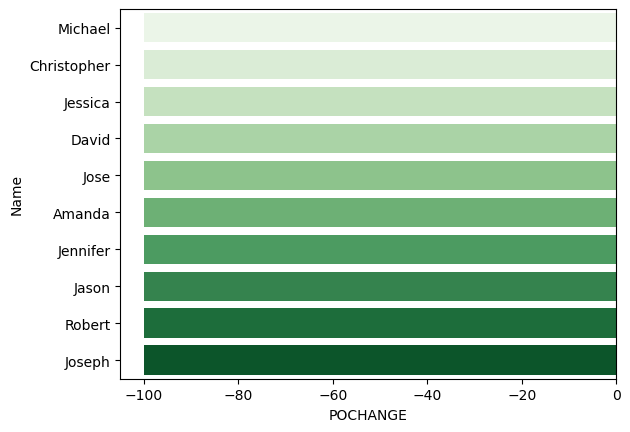

In [32]:
sns.barplot(dropv,y='Name',x='POCHANGE',orient='h',palette ='Greens');

In [33]:
boys_names = us_name[us_name['Gender'] == 'M']
boys_name= boys_names.groupby('Name')['Births'].sum().sort_values()
b=pd.DataFrame(boys_name.tail(10)).reset_index()

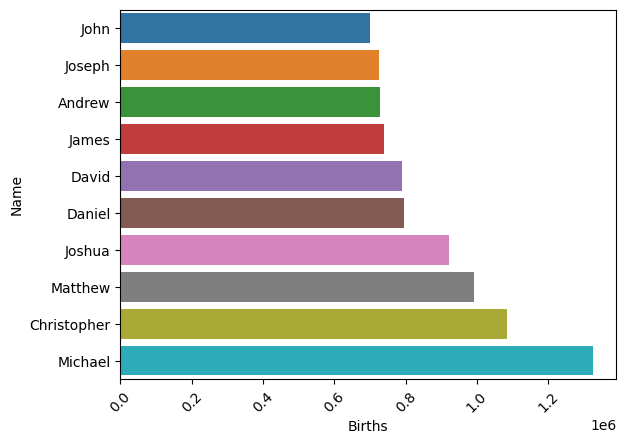

In [34]:
sns.barplot(b,x= 'Births',y='Name')
plt.xticks(rotation= 45);

In [35]:
girls_name =us_name[us_name['Gender']=='F']
girls_name= girls_name.groupby('Name')['Births'].sum().sort_values()
g=pd.DataFrame(girls_name.tail(10)).reset_index()

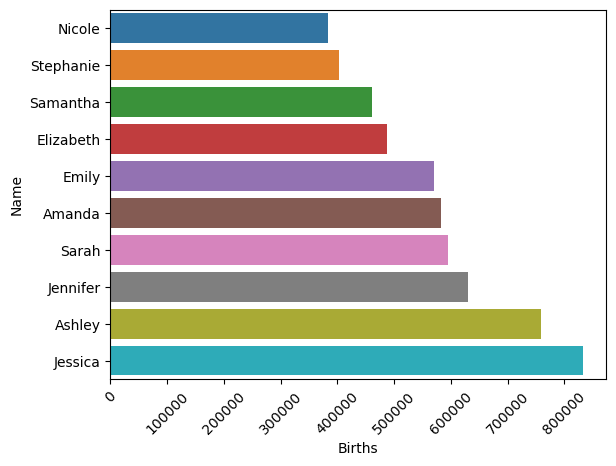

In [36]:
sns.barplot(g,x= 'Births',y='Name')
plt.xticks(rotation= 45);

In [37]:
repop = pd.DataFrame(us_name.groupby('Region')['Births'].sum())
repv=repop.head(100)
repv

,Births
Region,
Mid_Atlantic,13742667
Midwest,19245081
Mountain,6282217
New England,346203
New_England,3923010
Pacific,17540716
South,34219920


In [38]:
us_name['Region'].nunique()

7

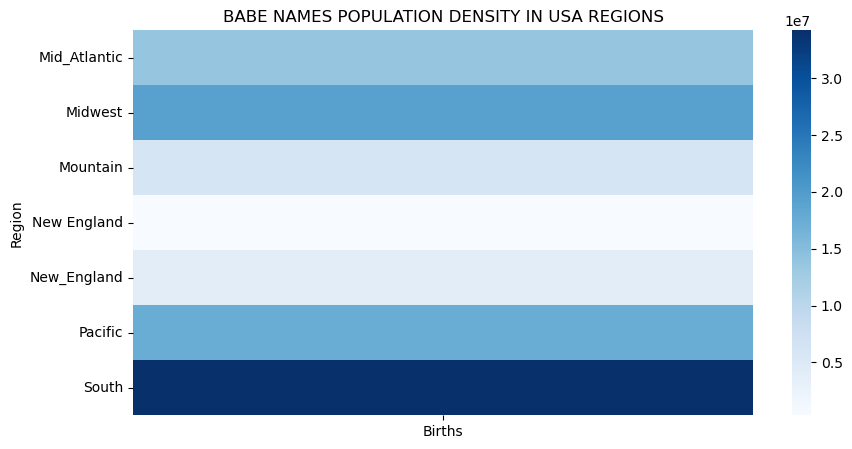

In [39]:
plt.figure(figsize=(10,5))
plt.title('BABE NAMES POPULATION DENSITY IN USA REGIONS')
sns.heatmap(repv,cmap='Blues');

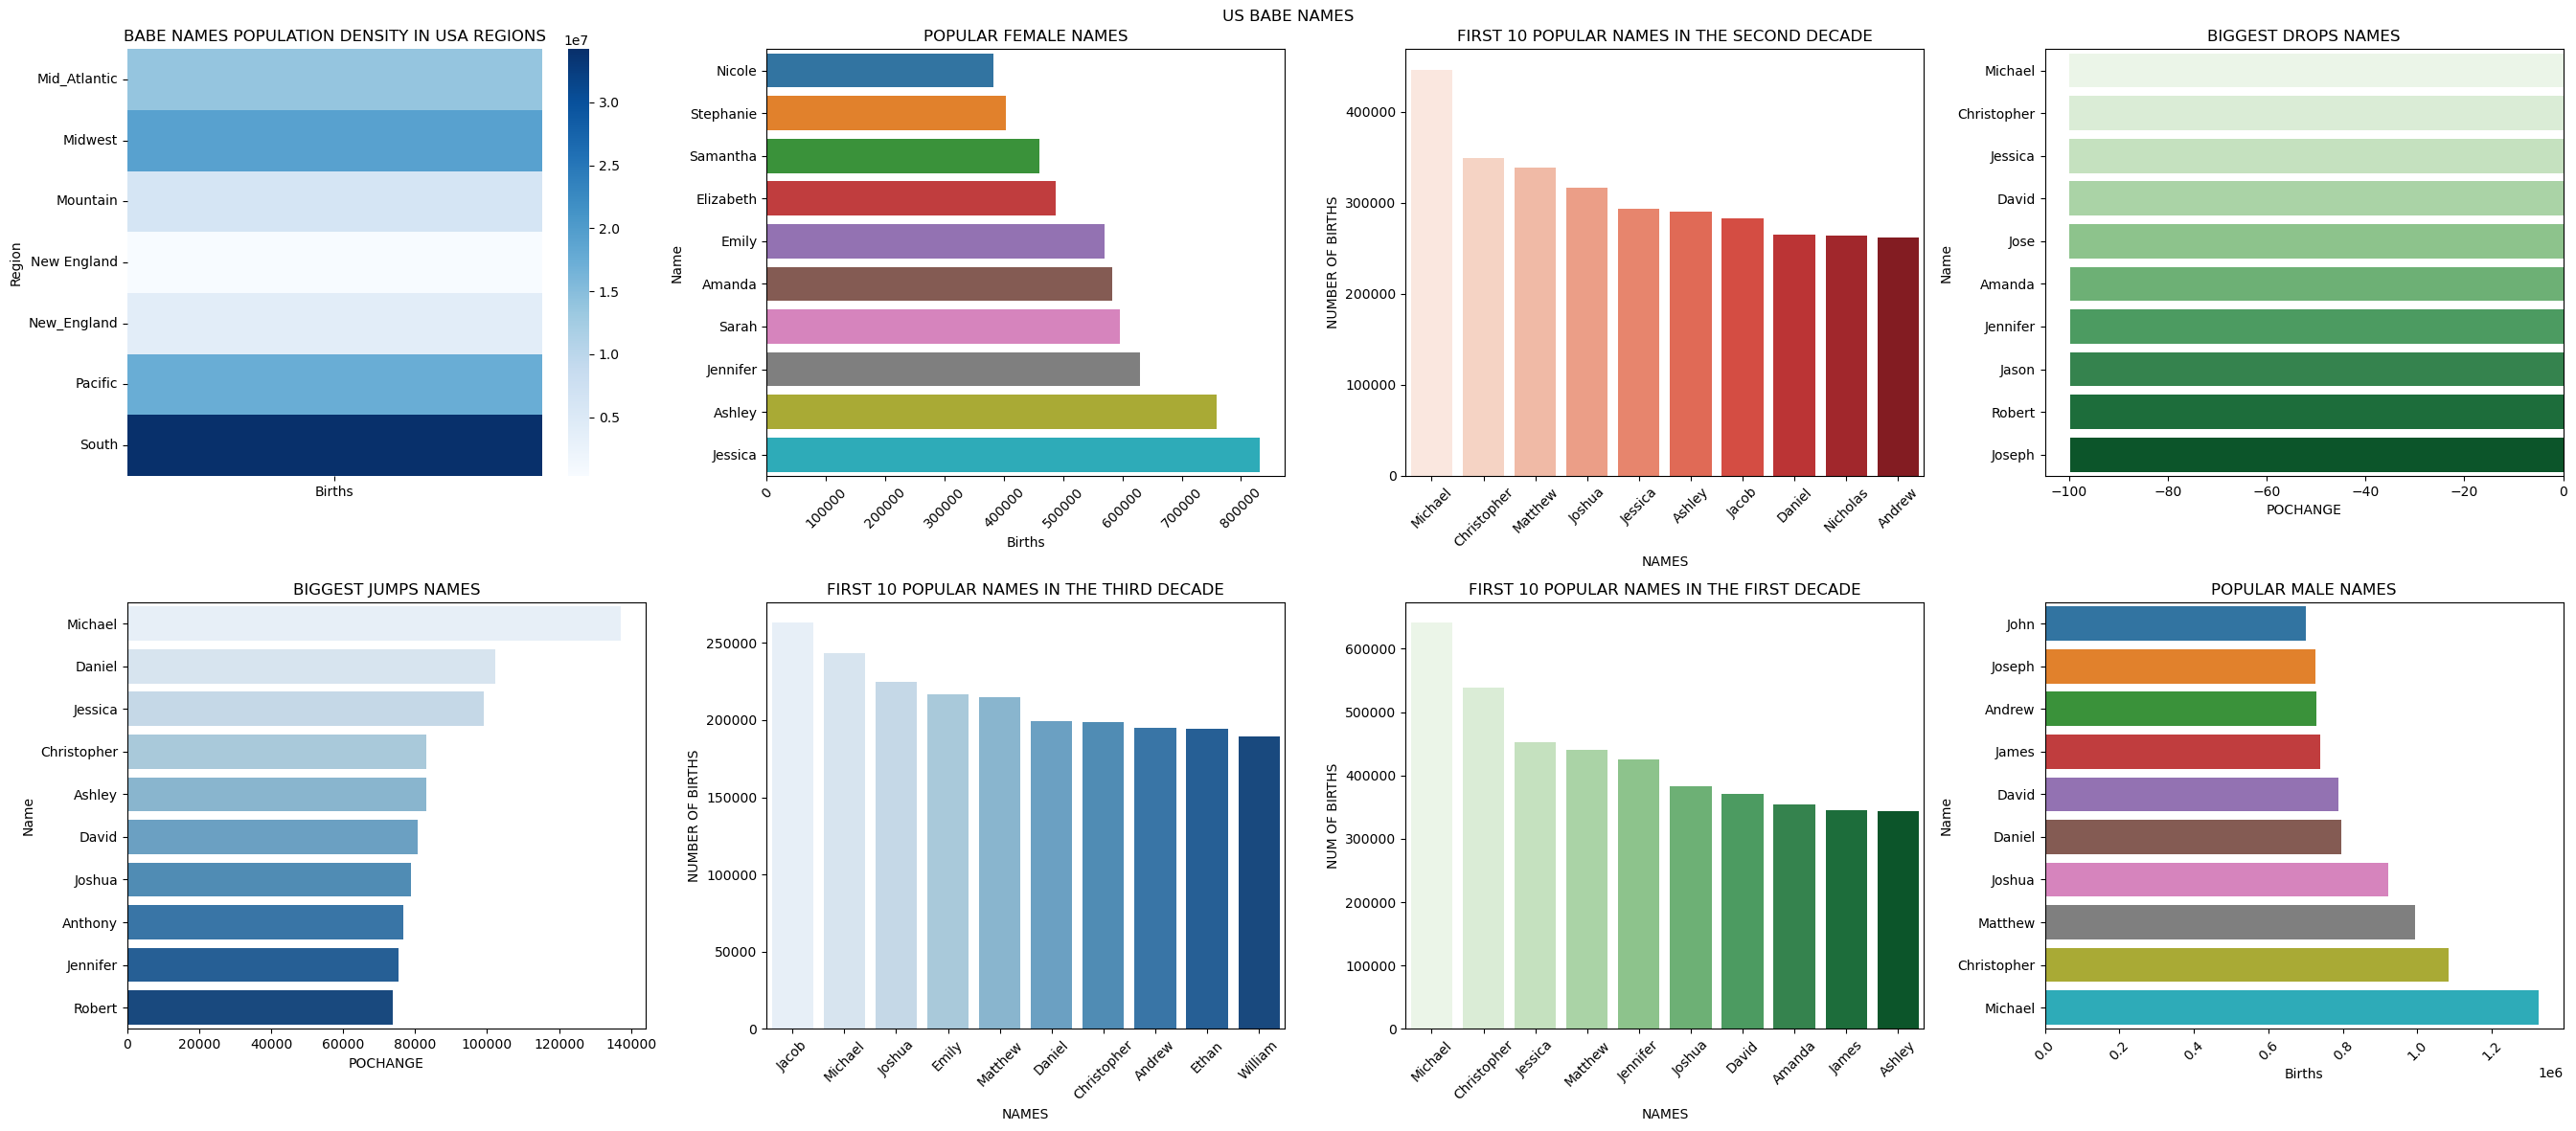

In [61]:
plt.subplots(2,4,figsize= (27,12))
plt.subplot(2,4,1)
plt.title('BABE NAMES POPULATION DENSITY IN USA REGIONS')
sns.heatmap(repv,cmap='Blues')

plt.subplot(2,4,2)
sns.barplot(g,x= 'Births',y='Name')
plt.xticks(rotation= 45)
plt.title('POPULAR FEMALE NAMES')

plt.subplot(2,4,8)
sns.barplot(b,x= 'Births',y='Name')
plt.xticks(rotation= 45)
plt.title('POPULAR MALE NAMES')

plt.subplot(2,4,4)
sns.barplot(dropv,y='Name',x='POCHANGE',orient='h',palette ='Greens')
plt.title('BIGGEST DROPS NAMES')


plt.subplot(2,4,5)
sns.barplot(jumpv,y='Name',x='POCHANGE',orient='h',palette ='Blues')
plt.title('BIGGEST JUMPS NAMES')

plt.subplot(2,4,6)
sns.barplot(VIZ3,x='Name',y='Births',palette='Blues')
plt.xticks(rotation = 45)
plt.xlabel('NAMES')
plt.ylabel('NUMBER OF BIRTHS')
plt.title('FIRST 10 POPULAR NAMES IN THE THIRD DECADE')

plt.subplot(2,4,7)
sns.barplot(VIZ1,x='Name',y='Births',palette= 'Greens')
plt.xticks(rotation = 45)
plt.xlabel('NAMES')
plt.ylabel('NUM OF BIRTHS')
plt.title('FIRST 10 POPULAR NAMES IN THE FIRST DECADE')

plt.subplot(2,4,3)
sns.barplot(VIZ2,x= 'Name',y= 'Births',palette= 'Reds')
plt.xticks(rotation = 45)
plt.xlabel('NAMES')
plt.ylabel('NUMBER OF BIRTHS')
plt.title('FIRST 10 POPULAR NAMES IN THE SECOND DECADE')

plt.suptitle('US BABE NAMES')
plt.tight_layout()

plt.savefig('Babe.png')